# Ejemplo de lectura de archivos .dat y .hea

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mne
import pandas as pd
import wfdb

Leemos la cruda

In [6]:
import wfdb

# indicar path sin extension
path_realizacion = r'datos_ejemplo\N1_evoked_raw_100_F1_R1'
record = wfdb.rdrecord(path_realizacion)

# ver que infomacion tiene atroden
print(record.__dict__)

{'record_name': 'N1_evoked_raw_100_F1_R1', 'n_sig': 2, 'fs': 48000, 'counter_freq': None, 'base_counter': None, 'sig_len': 2074112, 'base_time': None, 'base_date': None, 'comments': ['<SPL>: 100 <Stim Freq (kHz)>: 1 <Ear>: r <Trial Length (samples)>: 2002 <Condition>: Normal'], 'sig_name': ['ABR', 'OAE'], 'p_signal': array([[-1.87988282e+03, -1.89960003e-04],
       [-2.03247071e+03, -2.30109692e-04],
       [-2.24609376e+03, -2.26712227e-04],
       ...,
       [-1.50756836e+03,  1.34325027e-04],
       [-1.77612305e+03,  1.39856339e-04],
       [-2.01416016e+03,  1.13689899e-04]]), 'd_signal': None, 'e_p_signal': None, 'e_d_signal': None, 'file_name': ['N1_evoked_raw_100_F1_R1.dat', 'N1_evoked_raw_100_F1_R1.dat'], 'fmt': ['32', '32'], 'samps_per_frame': [1, 1], 'skew': [None, None], 'byte_offset': [None, None], 'adc_gain': [10737.4182, 21474836480.0], 'baseline': [0, 0], 'units': ['nV', 'V'], 'adc_res': [32, 32], 'adc_zero': [0, 0], 'init_value': [0, 0], 'checksum': [0, 768], 'block_

In [7]:
data = record.p_signal
print(data.shape)
print(f"({record.sig_len}, {record.n_sig})")
print(data.shape == (record.sig_len, record.n_sig))

(2074112, 2)
(2074112, 2)
True


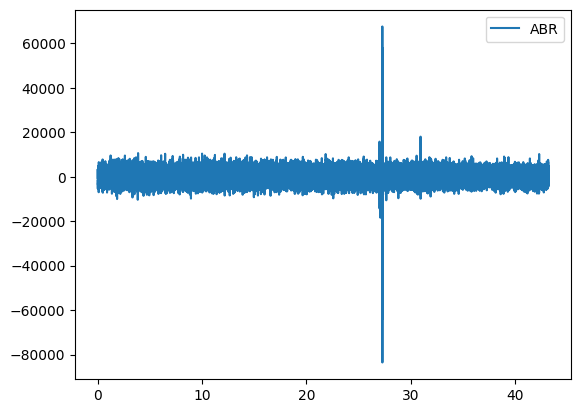

In [8]:
data = record.p_signal
data_ABR = data[:, 0]
data_OAE = data[:, 1]
fs = record.fs
n_samples = record.sig_len
t = np.linspace(0, n_samples/fs, n_samples)
plt.plot(t, data_ABR, label='ABR')
plt.legend()
plt.show()

In [21]:
SIG_LEN = record.sig_len
TR_LEN = 2002
TRESHOLD = 15000
sum_signal = np.zeros(TR_LEN)
count = 0
for i in range(0, (SIG_LEN - TR_LEN), TR_LEN):
    new_signal = data_ABR[i: i+TR_LEN]
    if np.abs(new_signal).max() > TRESHOLD:
        continue
    sum_signal += new_signal
    count += 1

prom_sig = sum_signal/count

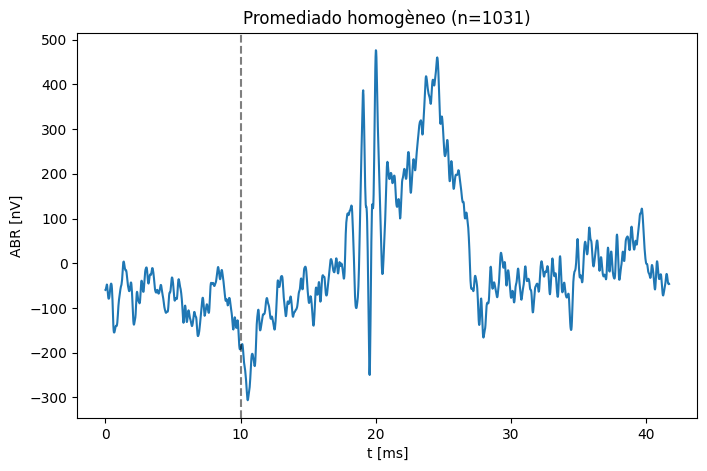

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(t[:TR_LEN]*1000, prom_sig)
ax.set_xlabel("t [ms]")
ax.set_ylabel("ABR [nV]")
ax.set_title(f"Promediado homogèneo (n={count})")
ax.axvline(10, linestyle='--', color='k', alpha=0.5)
plt.show()

In [19]:
SIG_LEN//TR_LEN

1036